<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result


X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
V = [np.array([[1], [2]]), np.array([[3], [4]])]
print(sum_prod(X,V))

[[44]
 [64]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M: np.array, threshold=0.5):
    size = M.shape
    for i in range(size[0]):
        for j in range(size[1]):
            M[i][j] = 1 if M[i][j] > threshold else 0
    return M
print(binarize(np.array([[1,2,3],[2,3,4],[3,4,5]])))
print()
print(binarize(np.array([[1,0.1,3],[0.2,3,4],[3,4,5]]), 2))

[[1 1 1]
 [1 1 1]
 [1 1 1]]

[[0. 0. 1.]
 [0. 1. 1.]
 [1. 1. 1.]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
def unique_rows(mat):
    size = mat.shape
    result = np.array([])
    for i in range(size[0]):
        res = []
        for j in range(size[1]):
            elem = mat[i,j]
            if elem not in res:
                res.append(elem)
        result = np.append(result, np.array([res]))
    return result
        

def unique_columns(mat):
    size = mat.shape
    result = np.array([])
    for i in range(size[1]):
        res = []
        for j in range(size[0]):
            elem = mat[j,i]
            if elem not in res:
                res.append(elem)
        result = np.append(result, np.array([res]))
    return result


print(unique_columns(np.array([[1,2,3],[4,5,6],[7,8,9]])))
print()
print(unique_rows(np.array([[1,2,3],[2,3,4],[3,4,5]])))
print()
print(unique_columns(np.array([[1,2,1],[1,5,1],[7,8,9]])))
print()
print(unique_rows(np.array([[1,1,3],[2,4,4],[5,4,5]])))


[1. 4. 7. 2. 5. 8. 3. 6. 9.]

[1. 2. 3. 2. 3. 4. 3. 4. 5.]

[1. 7. 2. 5. 8. 1. 9.]

[1. 3. 2. 4. 5. 4.]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Средние значения по столбцам:
[-0.17772242 -0.04187351 -0.07698504 -0.1991329 ]
Дисперсии по столбцам:
[1.46642453 2.06907937 1.77525058 0.00721289]
Средние значения по строкам:
[ 0.74236486 -0.96424327 -0.149907  ]
Дисперсии по строкам:
[0.53081024 0.72679044 1.28672152]


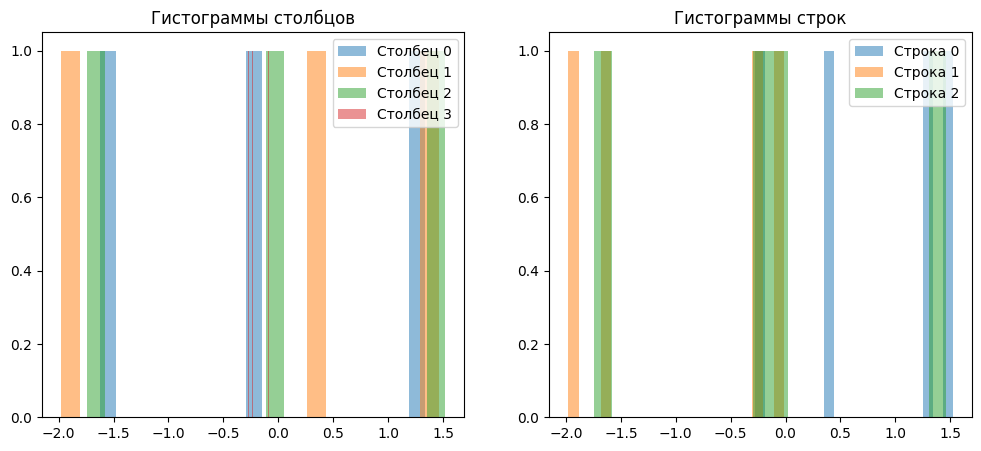

[[ 1.33604351  0.39042961  1.52085635 -0.27787001]
 [-1.6281624  -1.97949379 -0.01100516 -0.23831172]
 [-0.24104836  1.46344366 -1.74080633 -0.08121698]]


In [8]:
def generate_normal_matrix(m, n):
    matrix = np.random.normal(0, 1, (m, n))
    
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)

    print("Средние значения по столбцам:")
    print(col_means)
    print("Дисперсии по столбцам:")
    print(col_variances)

    print("Средние значения по строкам:")
    print(row_means)
    print("Дисперсии по строкам:")
    print(row_variances)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    for i in range(n):
        ax1.hist(matrix[:, i], bins=20, alpha=0.5, label=f"Столбец {i}")
    ax1.set_title("Гистограммы столбцов")
    ax1.legend()

    for i in range(m):
        ax2.hist(matrix[i, :], bins=20, alpha=0.5, label=f"Строка {i}")
    ax2.set_title("Гистограммы строк")
    ax2.legend()

    plt.show()

    return matrix

print(generate_normal_matrix(3,4))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [10]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    
    return matrix

print(chess(8,8,10,2))

[[10  2 10  2 10  2 10  2]
 [ 2 10  2 10  2 10  2 10]
 [10  2 10  2 10  2 10  2]
 [ 2 10  2 10  2 10  2 10]
 [10  2 10  2 10  2 10  2]
 [ 2 10  2 10  2 10  2 10]
 [10  2 10  2 10  2 10  2]
 [ 2 10  2 10  2 10  2 10]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [14]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.ones((n, m, 3)) * np.array(background_color)
    
    for i in range(m):
        for j in range(n):
            if i >= (m-a)//2 and i < (m+a)//2 and j >= (n-b)//2 and j < (n+b)//2:
                img[j, i] = np.array(rectangle_color)
    
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.ones((n, m, 3)) * np.array(bg_color)
    
    for i in range(m):
        for j in range(n):
            if (i-m//2)*2/a*2 + (j-n//2)*2/b*2 <= 1:
                img[j, i] = np.array(oval_color)
    
    return img


[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[128. 128. 128.]
  [128. 128. 128.]
  [128. 128. 128.]
  ...
  [128. 128. 128.]
  [128. 128. 128.]
  [128. 128. 128.]]

 [[128. 128. 128.]
  [128. 128. 128.]
  [128. 128. 128.]
  ...
  [128. 128. 128.]
  [128. 128. 128.]
  [128. 128. 128.]]

 [[128. 128. 128.]

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [15]:
time_series = [10, 15, 8, 12, 18, 14, 11, 16, 9, 13]

mean = np.mean(time_series)
print(f"Математическое ожидание: {mean}")


variance = np.var(time_series)
print(f"Дисперсия: {variance}")


std_dev = np.sqrt(variance)
print(f"СКО: {std_dev}")


local_maxima = []
local_minima = []
for i in range(1, len(time_series) - 1):
    if time_series[i] > time_series[i-1] and time_series[i] > time_series[i+1]:
        local_maxima.append(time_series[i])
    elif time_series[i] < time_series[i-1] and time_series[i] < time_series[i+1]:
        local_minima.append(time_series[i])
print(f"Локальные максимумы: {local_maxima}")
print(f"Локальные минимумы: {local_minima}")


p = 3 
moving_average = np.convolve(time_series, np.ones(p), 'valid') / p
print(f"Ряд, полученный методом скользящего среднего: {moving_average}")


Математическое ожидание: 12.6
Дисперсия: 9.239999999999998
СКО: 3.0397368307141326
Локальные максимумы: [15, 18, 16]
Локальные минимумы: [8, 11, 9]
Ряд, полученный методом скользящего среднего: [11.         11.66666667 12.66666667 14.66666667 14.33333333 13.66666667
 12.         12.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [16]:
labels = [0, 2, 3, 0]
num_classes = max(labels) + 1
one_hot = np.zeros((len(labels), num_classes), dtype=int)
one_hot[np.arange(len(labels)), labels] = 1

print(one_hot)

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
